## Predict Electricity Production using Fuzzy Time Series
### Proyek Akhir Semester Mata Kuliah Praktikum Data Mining

### 1. Data Preprocessing

In [1]:
import warnings
from pyFTS.partitioners import Grid
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [2]:
# dataset = pd.read_csv("MES_0223.csv",delimiter=",", encoding='cp1252')
dataset = pd.read_csv("./dataset/bulanan-ekspor-impor.csv")

In [3]:
dataset

,Bulan-Tahun,Nilai-Ekspor,Berat-Ekspor,Nilai-Impor,Berat-Impor
0,2014-01-01,1.447229e+10,4.915438e+10,1.491623e+10,11590996964
1,2014-02-01,1.463409e+10,4.341624e+10,1.379066e+10,10640029636
2,2014-03-01,1.519263e+10,4.929496e+10,1.452372e+10,11439923450
3,2014-04-01,1.429247e+10,4.554173e+10,1.625498e+10,13005419405
4,2014-05-01,1.482360e+10,4.741763e+10,1.477034e+10,12197088101
...,...,...,...,...,...
107,2022-12-01,2.382786e+10,5.478810e+10,1.986306e+10,17445166404
108,2023-01-01,2.232384e+10,5.141262e+10,1.844293e+10,15297835516
109,2023-02-01,2.132128e+10,5.315484e+10,1.591917e+10,13357927312
110,2023-03-01,2.341599e+10,6.396040e+10,2.058805e+10,17338475865


In [4]:
df = dataset.dropna()

In [5]:
df

,Bulan-Tahun,Nilai-Ekspor,Berat-Ekspor,Nilai-Impor,Berat-Impor
0,2014-01-01,1.447229e+10,4.915438e+10,1.491623e+10,11590996964
1,2014-02-01,1.463409e+10,4.341624e+10,1.379066e+10,10640029636
2,2014-03-01,1.519263e+10,4.929496e+10,1.452372e+10,11439923450
3,2014-04-01,1.429247e+10,4.554173e+10,1.625498e+10,13005419405
4,2014-05-01,1.482360e+10,4.741763e+10,1.477034e+10,12197088101
...,...,...,...,...,...
107,2022-12-01,2.382786e+10,5.478810e+10,1.986306e+10,17445166404
108,2023-01-01,2.232384e+10,5.141262e+10,1.844293e+10,15297835516
109,2023-02-01,2.132128e+10,5.315484e+10,1.591917e+10,13357927312
110,2023-03-01,2.341599e+10,6.396040e+10,2.058805e+10,17338475865


## 3. FTS

In [6]:
df

,Bulan-Tahun,Nilai-Ekspor,Berat-Ekspor,Nilai-Impor,Berat-Impor
0,2014-01-01,1.447229e+10,4.915438e+10,1.491623e+10,11590996964
1,2014-02-01,1.463409e+10,4.341624e+10,1.379066e+10,10640029636
2,2014-03-01,1.519263e+10,4.929496e+10,1.452372e+10,11439923450
3,2014-04-01,1.429247e+10,4.554173e+10,1.625498e+10,13005419405
4,2014-05-01,1.482360e+10,4.741763e+10,1.477034e+10,12197088101
...,...,...,...,...,...
107,2022-12-01,2.382786e+10,5.478810e+10,1.986306e+10,17445166404
108,2023-01-01,2.232384e+10,5.141262e+10,1.844293e+10,15297835516
109,2023-02-01,2.132128e+10,5.315484e+10,1.591917e+10,13357927312
110,2023-03-01,2.341599e+10,6.396040e+10,2.058805e+10,17338475865


## A. Negara dengan Kelas Produksi Rendah

In [269]:
# slovenia = df[df['Country'] == 'Slovenia']['Value'].values
# time_slovenia = df[df['Country'] == 'Slovenia']['Time'].values

In [7]:
# create plot for country_data for every category
import plotly.express as px

bulan_tahun = df['Bulan-Tahun'].values
nilai_ekspor = df['Nilai-Ekspor'].values

fig = px.line(df, x=bulan_tahun, y=nilai_ekspor, title='Nilai Ekspor Bulanan Indonesia')
fig.show()

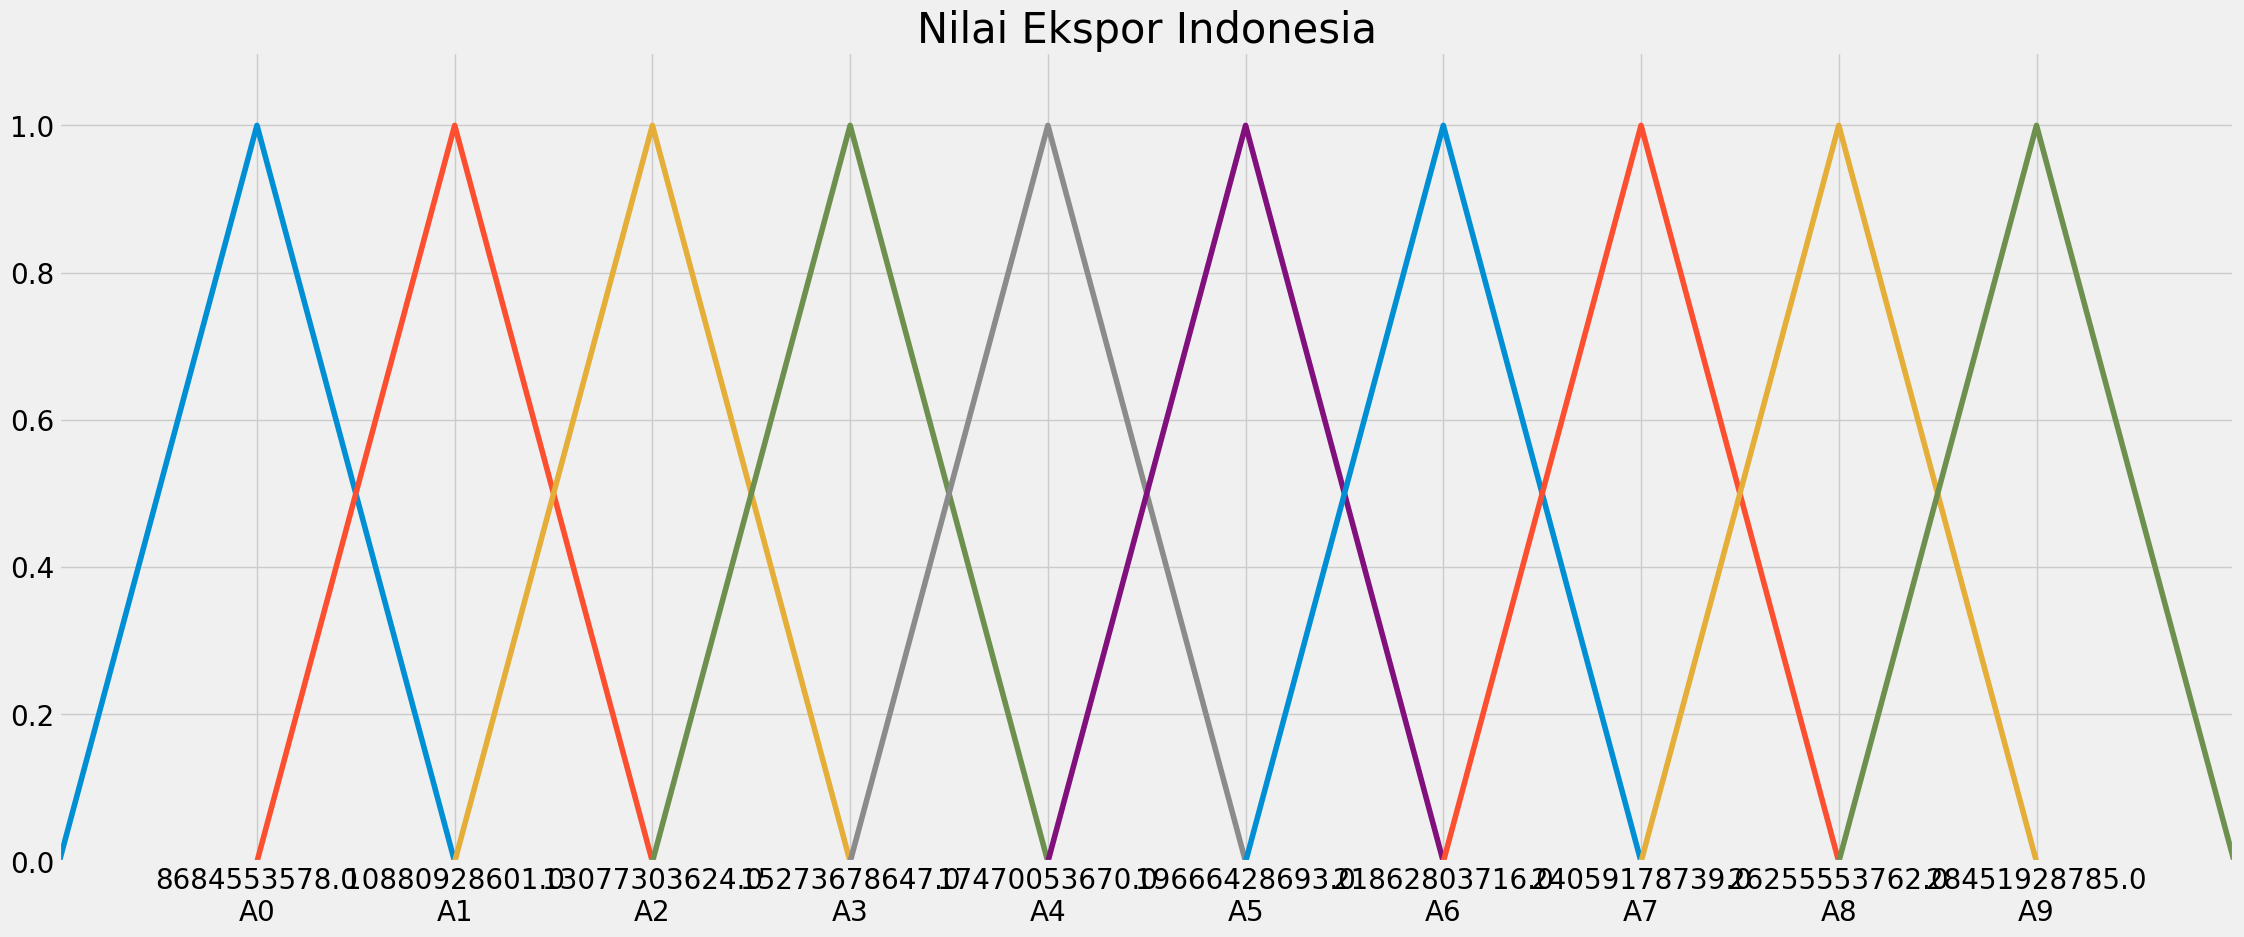

In [11]:
# make fuzzy set
fs = Grid.GridPartitioner(
    data=nilai_ekspor, npart=10)

# make fuzzy set plotly from fs
# fig = go.Figure()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[25, 10])

ax.set_xlim(0, len(nilai_ekspor))
ax.set_ylim(-0.1, 0.1)
# ax.set_xlim(0, len(df[df['Country'] == 'Slovenia']['Value'].values))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

fs.plot(ax)
ax.set_title("Nilai Ekspor Indonesia", fontsize=30)

plt.show()

In [12]:
print(fs)

Grid:
A0: trimf([6488178555.439899, 8684553578.373, 10880928601.306099])
A1: trimf([8684553578.373, 10880928601.306099, 13077303624.239199])
A2: trimf([10880928601.306099, 13077303624.239199, 15273678647.172298])
A3: trimf([13077303624.239199, 15273678647.172298, 17470053670.1054])
A4: trimf([15273678647.1723, 17470053670.1054, 19666428693.0385])
A5: trimf([17470053670.105396, 19666428693.038498, 21862803715.9716])
A6: trimf([19666428693.038494, 21862803715.971596, 24059178738.904697])
A7: trimf([21862803715.971596, 24059178738.904697, 26255553761.8378])
A8: trimf([24059178738.904697, 26255553761.8378, 28451928784.7709])
A9: trimf([26255553761.837795, 28451928784.770897, 30648303807.704])



In [13]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(nilai_ekspor)
print(model)

Conventional FTS:
A2 -> A0,A1,A2,A3
A1 -> A1,A2,A3
A0 -> A2
A3 -> A1,A2,A3,A4
A4 -> A3,A4,A5
A7 -> A5,A6,A7
A5 -> A5,A6,A8
A6 -> A5,A6,A7,A8
A9 -> A7
A8 -> A6,A8,A9



In [14]:
prediction = model.predict(nilai_ekspor)

In [18]:
fts_dates = df['Bulan-Tahun'].values
data_fts_result = pd.DataFrame({
    'date': fts_dates,
    'actual': nilai_ekspor,
    'prediction': prediction
})

In [19]:
# Plot the data using Plotly
import plotly.graph_objects as go
fig = go.Figure()

# Add actual data
fig.add_trace(go.Scatter(
    x=data_fts_result['date'], y=data_fts_result['actual'], mode='lines', name='Actual'))

# Add forecast data
fig.add_trace(go.Scatter(
    x=data_fts_result['date'], y=data_fts_result['prediction'], mode='lines', name='Forecast'))

# Set layout
fig.update_layout(
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=12),
        tickformat='%Y-%m-%d'
    ),
    yaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=20)
    ),
    legend=dict(
        x=1,
        y=0,
        xanchor='right',
        yanchor='bottom',
        font=dict(size=12)
    )
)

# Add vertical lines with alternating styles
for i in range(len(fts_dates)):
    if i % 2 == 0:
        fig.add_shape(type='line', x0=fts_dates[i], y0=0, x1=fts_dates[i], y1=1, line=dict(
            color='black', width=1, dash='solid'))
    else:
        fig.add_shape(type='line', x0=fts_dates[i], y0=0, x1=fts_dates[i], y1=1, line=dict(
            color='black', width=1, dash='dash'))

fig.show()

In [21]:
# show model performance
from pyFTS.benchmarks import Measures

print("RMSE : ", Measures.rmse(data_fts_result['actual'], data_fts_result['prediction']))
print("MAPE : ", Measures.mape(data_fts_result['actual'], data_fts_result['prediction']))

RMSE :  1499104836.3501062
MAPE :  8.293856877325293
